<h1 align="center">
</h1>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>Spring 2022</h5>

---


# Problem Set 03

StudentName = Milad Samimifar  
StudentID   = 400205577



# Q7. Ozone layer data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [7]:
# load data
df = pd.read_csv("./LAozone.data", sep=',')
df.head()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,3
1,5,5700,3,37,45,590,-24,128,100,4
2,5,5760,3,51,54,1450,25,139,60,5
3,6,5720,4,69,35,1568,15,121,60,6
4,4,5790,6,19,45,2631,-33,123,100,7


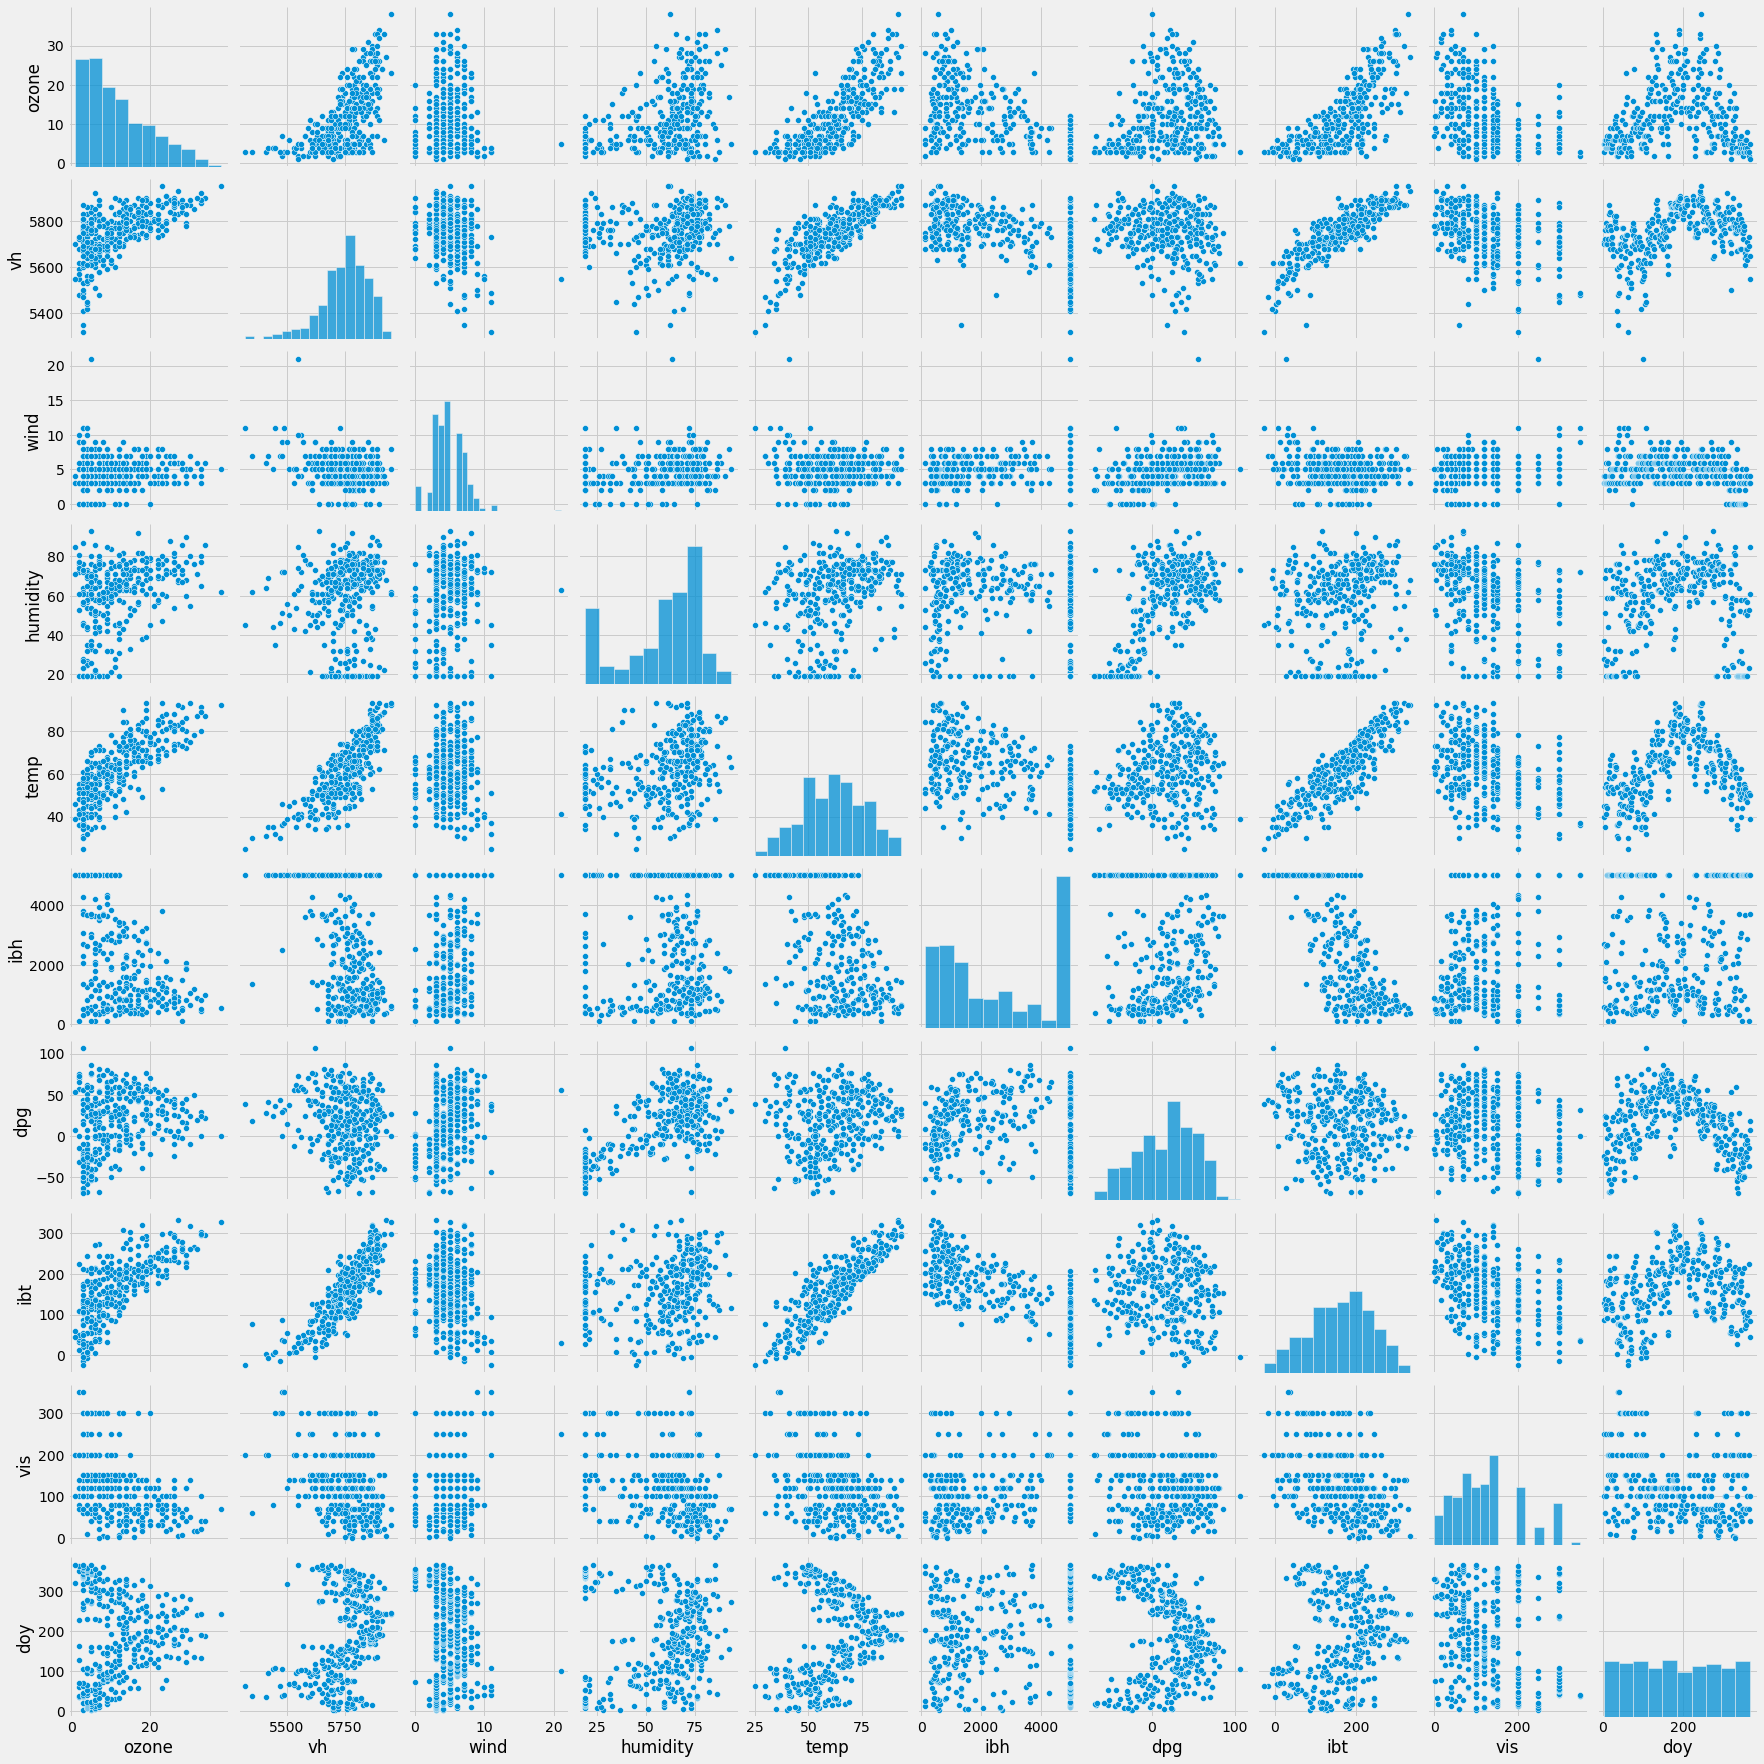

In [246]:
sns.pairplot(df)

## a. LinearRegression

In [20]:
# prepare data and labels
x = df.drop('ozone',axis=1)
y = df['ozone']
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)
# prepare train and test datas
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (231, 9)
x_test shape is: (99, 9)
y_train shape is: (231,)
y_test shape is: (99,)


In [21]:
# define model
model = LinearRegression()
# fit the model on our data
model.fit(x_train, y_train)
# underscore at the end indicates a fit parameter
print('b0:', model.coef_)
print('b1:', model.intercept_)
# prediction
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
# values
print('MSE train:', mean_squared_error(y_train,y_pred_train))
print('MSE test: ', mean_squared_error(y_test,y_pred_test))

b0: [-4.16003638 -1.90167995  5.36210359 18.82478143 -3.19291994  0.21833643
  8.40640697 -2.42663668 -3.24233509]
b1: 1.5621547597033576
MSE train: 18.4744168542573
MSE test:  21.615809047155746


## b.

LinearRegression: ozone and vh
b0: [0.04382812]
b1: -240.52364615839878


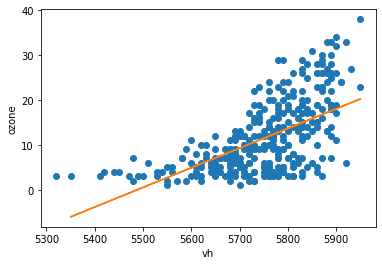

MSE train: 41.56958491600765
MSE test:  38.03334904132767
LinearRegression: ozone and wind
b0: [-0.12863073]
b1: 12.30832942751925


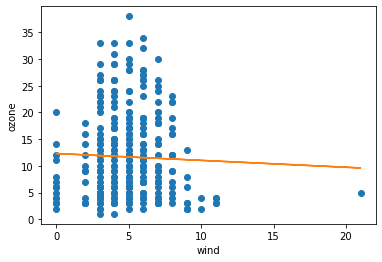

MSE train: 62.88701017540656
MSE test:  66.66011676546138
LinearRegression: ozone and humidity
b0: [0.17493108]
b1: 1.3890110771331052


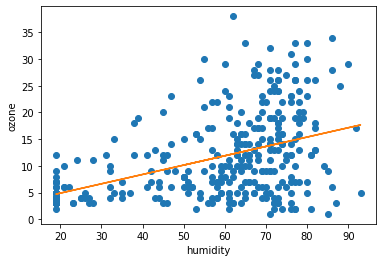

MSE train: 51.25153324256944
MSE test:  50.86756540966649
LinearRegression: ozone and temp
b0: [0.43277188]
b1: -15.131594727485766


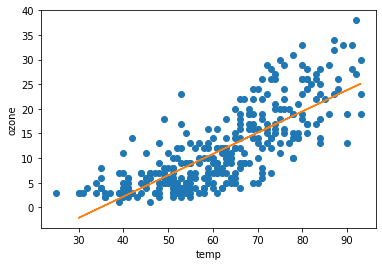

MSE train: 24.956636257125243
MSE test:  25.16715646274405
LinearRegression: ozone and ibh
b0: [-0.00281467]
b1: 19.16362577646152


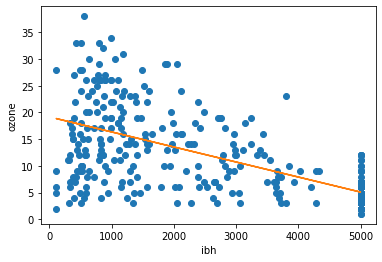

MSE train: 37.24443159999996
MSE test:  52.74384264908929
LinearRegression: ozone and dpg
b0: [0.04672126]
b1: 10.81986105185701


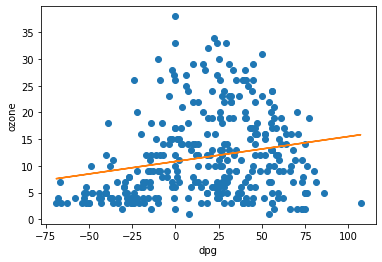

MSE train: 60.26356802807192
MSE test:  62.97652432734293
LinearRegression: ozone and ibt
b0: [0.07747874]
b1: -0.7937526540661004


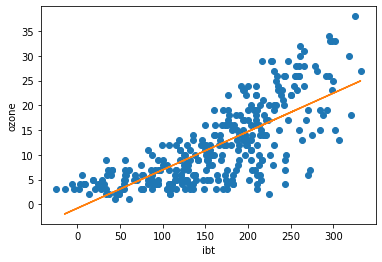

MSE train: 28.149964209352373
MSE test:  29.066652158741704
LinearRegression: ozone and vis
b0: [-0.04735699]
b1: 17.640074676460767


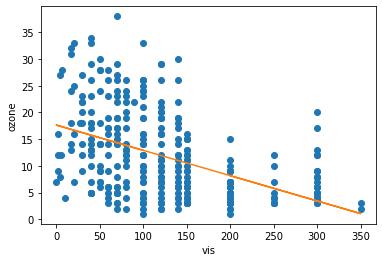

MSE train: 48.51621878277072
MSE test:  58.77677199621607


In [23]:
for i in range(8):
    print('================================================')
    print('LinearRegression: {} and {}'.format(df.columns[0], df.columns[i+1]))
    X = np.array(df.iloc[:,i+1]).reshape(-1, 1)
    y = np.array(df.iloc[:,0])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    model = LinearRegression()#normalize=True)

    # fit the model on our data
    model.fit(X_train, y_train)
    # underscore at the end indicates a fit parameter
    print('b0:', model.coef_)
    print('b1:', model.intercept_)
    # prediction
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # plot
    plt.plot(X.squeeze(), y, 'o')
    plt.plot(X_train.squeeze(), y_pred_train)
    plt.xlabel(df.columns[i+1])
    plt.ylabel(df.columns[0])
    plt.show()
    # calculate mse
    print('MSE train:', mean_squared_error(y_train,y_pred_train))
    print('MSE test: ', mean_squared_error(y_test,y_pred_test))


ozone and temp have minimum MSE.

### LinearRegression: ozone and temp

LinearRegression: ozone and temp
b0: [0.43277188]
b1: -15.131594727485766
MSE train: 24.956636257125243
MSE test:  25.16715646274405


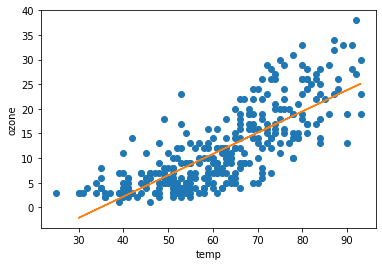

In [24]:
print('LinearRegression: {} and {}'.format(df.columns[0], df.columns[4]))

X = np.array(df.iloc[:,4]).reshape(-1, 1)
y = np.array(df.iloc[:,0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()#normalize=True)

# fit the model on our data
model.fit(X_train, y_train)
# underscore at the end indicates a fit parameter
print('b0:', model.coef_)
print('b1:', model.intercept_)
# prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# plot
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_train.squeeze(), y_pred_train)
plt.xlabel(df.columns[4])
plt.ylabel(df.columns[0])
# calculate mse
print('MSE train:', mean_squared_error(y_train,y_pred_train))
print('MSE test: ', mean_squared_error(y_test,y_pred_test))


# c.

median: 62.0
LinearRegression for first part:
b0: [0.61632837]
b1: -28.138492507585354
MSE train: 30.80167377090114
MSE test:  32.15442806845692
LinearRegression for second part:
b0: [0.15075361]
b1: -1.1953049887832483
MSE train: 12.732908775844871
MSE test:  10.737060491843076
plot:


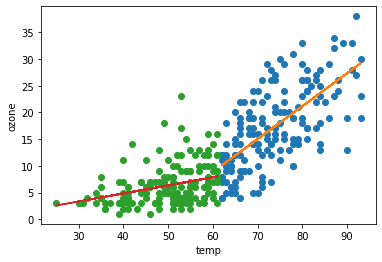

In [25]:
X = np.array(df.iloc[:,4])#.reshape(-1, 1)
y = np.array(df.iloc[:,0])
# find median
median = np.median(X)
print('median:', median)
# condtion for partions
con1 = (X >= median)
con2 = (X < median)
# find partions
X1 = X[con1].reshape(-1, 1)
y1 = y[con1]

X2 = X[con2].reshape(-1, 1)
y2 = y[con2]
# LinearRegression for first part
print('======================================')
print('LinearRegression for first part:')
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
# define model
model = LinearRegression()#(normalize=True)
# fit the model on our data
model.fit(X_train, y_train)
# underscore at the end indicates a fit parameter
print('b0:', model.coef_)
print('b1:', model.intercept_)
# prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# plot
plt.plot(X1.squeeze(), y1, 'o')
plt.plot(X_train.squeeze(), y_pred_train)
plt.xlabel(df.columns[4])
plt.ylabel(df.columns[0])
# calculate mse
print('MSE train:', mean_squared_error(y_train,y_pred_train))
print('MSE test: ', mean_squared_error(y_test,y_pred_test))
# LinearRegression for second part
print('======================================')
print('LinearRegression for second part:')
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
# define model
model = LinearRegression()#(normalize=True)
# fit the model on our data
model.fit(X_train, y_train)
# underscore at the end indicates a fit parameter
print('b0:', model.coef_)
print('b1:', model.intercept_)
# prediction
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# plot
plt.plot(X2.squeeze(), y2, 'o')
plt.plot(X_train.squeeze(), y_pred_train)
plt.xlabel(df.columns[4])
plt.ylabel(df.columns[0])
# calculate mse
print('MSE train:', mean_squared_error(y_train,y_pred_train))
print('MSE test: ', mean_squared_error(y_test,y_pred_test))
print('======================================\nplot:')



همان طور که از نمودار و نتایج پیداست، خطای میانگین مجموع مربعات برای بخش دوم کمتر و برابر ۱۲ شده است. همان طور که انتظار داریم مقدار خطای میانگین مجموع مربعات روی کل داده ها، بین خطای میانگین مجموع مربعات در نیمه ی اول داده ها و خطای میانگین مجموع مربعات در نیمه ی دوم داده ها است. خطای میانگین مجموع مربعات در نیمه ی اول برابر ۳۰ و خطای میانگین مجموع مربعات در نیمه ی دوم برابر ۳۰ و خطای میانگین مجموع مربعات روی کل داده ها برابر ۲۴ روی داده ی آموزش شده است.

# Q8. Insurance data

In [38]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [39]:
# load data
ins=pd.read_csv("./insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16.885
1,18,male,33.770,1,no,southeast,1.726
2,28,male,33.000,3,no,southeast,4.449
3,33,male,22.705,0,no,northwest,21.984
4,32,male,28.880,0,no,northwest,3.867


In [40]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13.270415
std,14.049960,6.098187,1.205493,12.110013
min,18.000000,15.960000,0.000000,1.122000
25%,27.000000,26.296250,0.000000,4.740000
50%,39.000000,30.400000,1.000000,9.382000
75%,51.000000,34.693750,2.000000,16.640000
max,64.000000,53.130000,5.000000,63.770000


In [41]:
# encoding
encoder = LabelEncoder()

ins['sex'] = encoder.fit_transform(ins['sex'])
sex = {index : label for index, label in enumerate(encoder.classes_)}
print(sex)

ins['smoker'] = encoder.fit_transform(ins['smoker'])
smoker = {index : label for index, label in enumerate(encoder.classes_)}
print(smoker)

ins['region'] = encoder.fit_transform(ins['region'])
region = {index : label for index, label in enumerate(encoder.classes_)}
print(region)

{0: 'female', 1: 'male'}
{0: 'no', 1: 'yes'}
{0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}


ب. همان طور که از کد بالا پیداست برای انجام انکدینگ از تابع فیت ترنسفرم استفاده کردیم و ویژگی های مختلف را به عددی متناظر کردیم که بتوان در رگرسیون خطی محاسبات لازم را انجام داد. نتیجه ی انجام این کار نظیر شدن اسامی مختلف به اعداد دلخواه ما هستند که میتوان اکنون رگرسیون خطی را انجام داد. در غیر این صورت نمیتوانستیم از این ویژگی ها استفاده کنیم.

In [42]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16.885
1,18,1,33.770,1,0,2,1.726
2,28,1,33.000,3,0,2,4.449
3,33,1,22.705,0,0,1,21.984
4,32,1,28.880,0,0,1,3.867


In [43]:
# prepare data and labels
x=ins.drop('charges',axis=1)
y=ins['charges']
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

In [44]:
# train and test datas
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (1070, 6)
x_test shape is: (268, 6)
y_train shape is: (1070,)
y_test shape is: (268,)


## a. Mean

In [72]:
y_mean = np.array(y_train).mean()
np.square(np.array(y_test - y_mean)).mean()

155.39091610552893

## b. Linear Regression

In [74]:
# define model
model = LinearRegression()
# fit the model on our data
model.fit(x_train, y_train)
# underscore at the end indicates a fit parameter
print('b0:', model.coef_)
print('b1:', model.intercept_)
# prediction
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
# values
print('MSE train:', mean_squared_error(y_train,y_pred_train))
print('MSE test: ', mean_squared_error(y_test,y_pred_test))

b0: [ 1.18246107e+01 -1.88274038e-02  1.24809509e+01  2.12538821e+00
  2.36478390e+01 -8.13835674e-01]
b1: -1.960504535469676
MSE train: 37.280729320350446
MSE test:  33.63491701004698


مقایسه با بخش الف: همان طور که میبیند در این حالت خطای تست ۳۳ شده که از خطای تست در قسمت الف که حدودا ۱۵۵ بود بسیار بهتر است که با توجه به مدل های انخاب شده در دو بخش الف و ب این انتظار را داشتیم.

## c. Noise variance and R2 score
برای این بخش از فرمول اسلاید استفاده کردیم.

In [80]:
p = 7

RSS = np.sum(np.square(y_train - y_pred_train))
var_noise = RSS/(len(y_train)-p-1)

print('Noise variance train:', var_noise)

Noise variance train: 37.56156343952446


In [81]:
print('r2 score train:', r2_score(y_train,y_pred_train))
print('r2 score test: ', r2_score(y_test,y_pred_test))

r2 score train: 0.7417047943814352
r2 score test:  0.7833474892332242
